In [2]:
import sklearn
## Creating sample dataset
from sklearn.datasets import make_circles

nn_sample =1000

## Create Circles
X, y= make_circles(nn_sample,
                   noise=0.03, 
                   random_state=42)



In [3]:
print(f" first 5 X features : \n{X[:5]}")
print(f"first 5 y labels :\n {y[:5]}")



 first 5 X features : 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 y labels :
 [1 1 1 1 0]


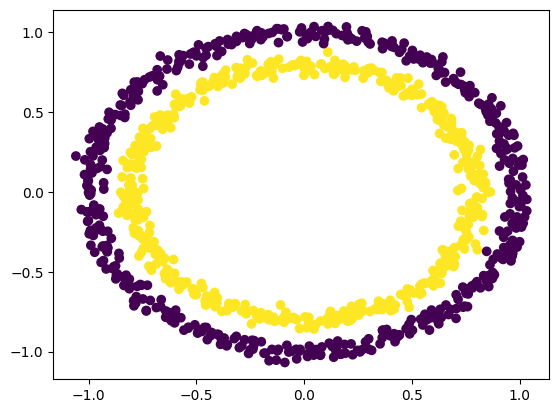

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x= X[:,0],
            y= X[:,1],
            c=y)

In [5]:
import pandas

pandas.DataFrame({"X1": X[:,0],
                  "X2":X[:,1],
                  "label": y})

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Change the numpy array to tensor

In [6]:
import torch
print(type(X))
print(X.shape, y.shape)

X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X.dtype
y.dtype



<class 'numpy.ndarray'>
(1000, 2) (1000,)


torch.float32

In [7]:
X.shape
X[:,0]

tensor([ 7.5425e-01, -7.5616e-01, -8.1539e-01, -3.9373e-01,  4.4221e-01,
        -4.7965e-01, -1.3648e-02,  7.7151e-01, -1.6932e-01, -1.2149e-01,
        -6.4249e-01,  5.6947e-01, -1.1774e-01,  7.3410e-01,  6.0078e-01,
         1.9023e-01, -9.3695e-01,  1.0706e-01, -8.1891e-01, -6.4210e-01,
         6.2683e-01, -5.6229e-01, -2.1267e-02,  7.3977e-01, -9.0905e-01,
        -9.3699e-01,  2.8662e-01,  8.2626e-01,  2.5343e-01,  6.5795e-01,
        -3.1483e-01, -2.2399e-01,  8.4439e-03,  1.0050e+00, -8.9516e-02,
        -7.8857e-01, -5.6821e-01,  4.4765e-01,  2.6326e-01,  7.4502e-01,
        -5.9712e-01,  3.6193e-01, -7.1424e-01,  8.3384e-01, -8.3398e-01,
        -9.1086e-01,  4.8763e-01,  2.3074e-01,  7.5841e-01, -4.1275e-01,
         4.7618e-01,  3.9996e-02, -9.6633e-01,  4.7791e-01,  9.2801e-01,
         9.0580e-01,  8.0310e-02,  9.7179e-01, -9.5781e-01, -5.1338e-01,
        -7.6043e-01,  8.2012e-01,  6.2879e-01, -9.0551e-01,  2.1737e-01,
        -6.0125e-01, -3.3371e-01, -1.0114e-01,  6.5

Split the data into training and testing using train_test_split module of sckikit learn

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(len(x_train), len(x_test), len(y_train), len(y_test))

800 200 800 200


Building a module using torch.nn module

In [4]:
from torch import nn
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Create 2 Layers for the model to understand the pattern
        self.layer_1 = nn.Linear(in_features=2,out_features=5)  # Input has 2 values of X tensor so in_features =2 and out_features is random number to read the pattern
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # Input has 5 values from the Layer 1 and out feature is to predict 1 value

# Create the forward pass function to do the computation
    def forward(self,x):
        # return the output of layer 2, a single feature , same shape as y
        return self.layer_2(self.layer_1(x))



In [10]:
model_0 = CircleModelV0()

model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3871, -0.6333],
                      [-0.5822, -0.3869],
                      [-0.6192,  0.3033],
                      [ 0.1796,  0.3998],
                      [ 0.2356, -0.5781]])),
             ('layer_1.bias',
              tensor([ 0.2193, -0.4445,  0.5857, -0.0125,  0.6256])),
             ('layer_2.weight',
              tensor([[-0.4151,  0.2157,  0.1594, -0.3620,  0.4156]])),
             ('layer_2.bias', tensor([0.0630]))])

In [11]:
model_0= nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
## Setup a loss function for the Binary Classification problem use case

loss_function = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with sigmoid activation function builtin

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [15]:
# Calculate the accuracy of the model for Binary classification

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct /len(y_pred)) * 100
    return acc


In [14]:
### Logits are the raw output of the models withput passing through any activation function

model_0.eval()
with torch.inference_mode():
    y_logits = model_0(x_test)

print(y_logits.shape)
print(y_test.shape)


## Raw Logits are not in the format of the prediction label 0 or 1. So it needs to be passed to an activation function(sigmoid)

y_probs = torch.sigmoid(y_logits) # -> converts the logits to prediction probablity

y_pred=torch.round(y_probs) # -> converts the prediction probability to prediction labels
print(y_pred.shape)
y_pred.squeeze()

torch.Size([200, 1])
torch.Size([200])
torch.Size([200, 1])


tensor([1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 1.])

Build the Training loop for the model

In [15]:
torch.manual_seed(42)
model_0.train()
epochs =100



In [16]:
for epoch in range(epochs):
    #0 Put the model in training mode
    model_0.train()

    #1 Forward Pass and sigmoid activation function
    y_logits=model_0.forward(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into prediction probability and then into labels

    #2 calculate loss function and accuracy
    loss= loss_function(y_logits,y_train) # BCEloss function expects the input as raw logits rather than pred probabilyt
    train_accuracy = accuracy_fn(y_true = y_train, y_pred = y_pred)

    #3 Optimizer to Zero grad
    optimizer.zero_grad()

    #4 Back propagation to tune the parameters
    loss.backward()

    # Back propagation to tune the parameters using gradient descent
    optimizer.step()

    ### Testing the model
    model_0.eval()

    with torch.inference_mode():
        #1. forward pass
        test_logits = model_0.forward(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate the loss
        test_loss = loss_function(test_logits, y_test)
        test_accuracy = accuracy_fn(y_true = y_test, y_pred = test_pred)

        #3 find the results
        if epoch %10 ==0:
            print(f"Epoch : {epoch} | Loss : {loss} | Training Acc {train_accuracy} | Test Loss : {test_loss} | \
                  test accuracy: {test_accuracy}" )



    


Epoch : 0 | Loss : 0.6947829723358154 | Training Acc 47.75 | Test Loss : 0.6980201601982117 |                   test accuracy: 49.0
Epoch : 10 | Loss : 0.6942106485366821 | Training Acc 48.625 | Test Loss : 0.697458803653717 |                   test accuracy: 47.5
Epoch : 20 | Loss : 0.6938636898994446 | Training Acc 49.125 | Test Loss : 0.6970618963241577 |                   test accuracy: 47.0
Epoch : 30 | Loss : 0.6936362981796265 | Training Acc 49.25 | Test Loss : 0.6967530846595764 |                   test accuracy: 47.5
Epoch : 40 | Loss : 0.6934781074523926 | Training Acc 49.625 | Test Loss : 0.696498692035675 |                   test accuracy: 46.0
Epoch : 50 | Loss : 0.6933630108833313 | Training Acc 49.625 | Test Loss : 0.6962829828262329 |                   test accuracy: 46.0
Epoch : 60 | Loss : 0.6932768821716309 | Training Acc 49.875 | Test Loss : 0.696097195148468 |                   test accuracy: 46.0
Epoch : 70 | Loss : 0.6932113766670227 | Training Acc 50.0 | Test Lo

In [14]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print("Helper functions already exists..skipping download")
else:
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Helper functions already exists..skipping download


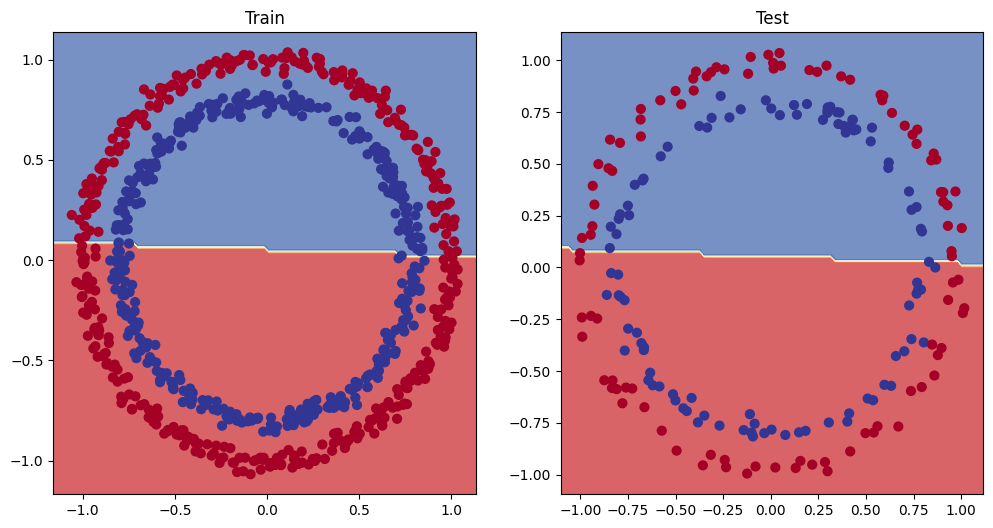

In [18]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

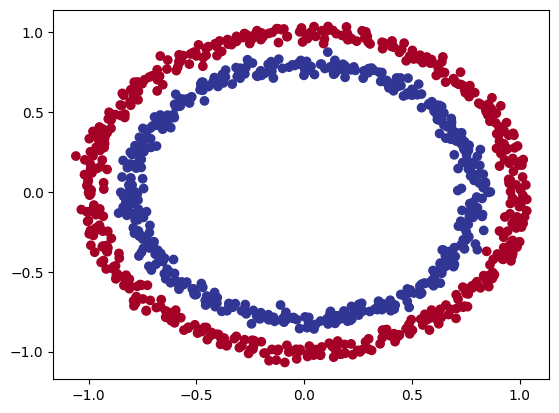

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample =1000

X, y = make_circles(n_samples=n_sample, noise=0.03, random_state=42)

plt.scatter(x=X[:,0], y=X[:,1],c=y, cmap=plt.cm.RdYlBu)



In [7]:
##convert data to tensor
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [8]:
X.shape
y.shape

torch.Size([1000])

In [9]:
## Split training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
#print(len(X_train.size()), len(X_test.shape), len(y_train.shape), len(y_test.shape) )

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [10]:
from torch import nn

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=10)
        self.layer2=nn.Linear(in_features=10,out_features=10)
        self.layer3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [11]:
Model_1 = CircleModelV1()

In [12]:
# setup Loss and Optimizer
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(Model_1.parameters(),lr=0.1)


In [16]:
print(X_train.size())

torch.Size([800, 2])


In [16]:
# Training a model with Linearity and Non Linearity

torch.manual_seed(42)

# Loop through the data
epochs = 1000

for epoch in range(epochs):
    ##1. Put the Model in training mode
    Model_1.train()

    ##2. Call the forward function for Train data
    y_logits=Model_1.forward(X_train).squeeze()
    #print(y_logits[:5])
    y_pred = torch.round(torch.sigmoid(y_logits)) #-> Changes the logits to Prediction Probabilities -> Predictions using round
    
    ##3. Calcuate the loss
    loss = loss_function(y_logits, y_train)  #-> Takes in the logits as input as the function applies sigmoid
    acc= accuracy_fn(y_true = y_train, y_pred= y_pred)

    ##4. rest the optimizer Gradient to Zero 
    optimizer.zero_grad()

    ##5. Backward propagation
    loss.backward()

    ##6. Optimzer step function for activating Gradient descent
    optimizer.step() 

    ### Put the Model in testing mode
    Model_1.eval()
    with torch.inference_mode():
        test_logits = Model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_function(test_logits, y_test)
        test_accuracy = accuracy_fn(y_test, test_pred)

    ## Print the results of the Training and testing
    if epoch %100==0:
        print(f"epoch :-> {epoch}, Training loss :-> {loss:.4f} Training Accuracy:-> {acc:.2f} Testing loss :-> {test_loss:.4f} Test Accuracy:-> {test_accuracy:.2f}")



epoch :-> 0, Training loss :-> 0.6945 Training Accuracy:-> 49.75 Testing loss :-> 0.6955 Test Accuracy:-> 48.00
epoch :-> 100, Training loss :-> 0.6890 Training Accuracy:-> 54.37 Testing loss :-> 0.6895 Test Accuracy:-> 52.00
epoch :-> 200, Training loss :-> 0.6858 Training Accuracy:-> 54.62 Testing loss :-> 0.6869 Test Accuracy:-> 50.50
epoch :-> 300, Training loss :-> 0.6819 Training Accuracy:-> 54.75 Testing loss :-> 0.6843 Test Accuracy:-> 51.00
epoch :-> 400, Training loss :-> 0.6768 Training Accuracy:-> 57.25 Testing loss :-> 0.6812 Test Accuracy:-> 53.50
epoch :-> 500, Training loss :-> 0.6705 Training Accuracy:-> 61.00 Testing loss :-> 0.6772 Test Accuracy:-> 56.50
epoch :-> 600, Training loss :-> 0.6623 Training Accuracy:-> 61.88 Testing loss :-> 0.6718 Test Accuracy:-> 56.00
epoch :-> 700, Training loss :-> 0.6514 Training Accuracy:-> 62.00 Testing loss :-> 0.6642 Test Accuracy:-> 56.00
epoch :-> 800, Training loss :-> 0.6363 Training Accuracy:-> 65.00 Testing loss :-> 0.6524

In [17]:
# Make predictions
Model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(Model_1(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

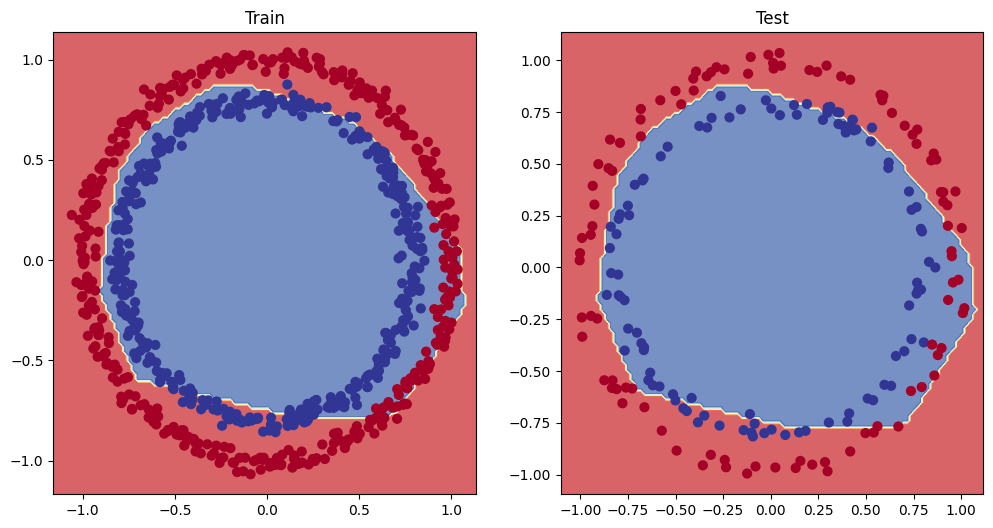

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(Model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(Model_1, X_test, y_test) # model_3 = has non-linearity